# Jake Graham
# GEOS 518
## Problem Set 2: Autoregressive Models

In this Jupyter notebook, I will perform the following tasks:
    1. Read in the dataset and perform any additional pre-processing needed
    2. Split the dataset into a "training" and "test" sets
    3. Estimate the paramaters of an AR(1) model using the training dataset
        * Compute the autocorrelation function
        * Use Yule-Walker equations to estimate the AR(1) parameters based on the dataset
    4. Estimate the parameters of an AR(2) model using the training dataset
        * Use Yule-Walker equations to estimate the AR(2) parameters based on the dataset
        * Use the statsmodel AR tools to estimate the parameters based on the dataset
        * Compare the YW parameters to those from the statsmodel library
    5. Apply the AR(1) and AR(2) models to the "test" dataset
    6. Plot the modeled time series for the AR(1) and AR(2) models against the observed time series for comparison
    7. Comment on the key differences and distinctions between the models themselves and the extent to which they reproduce the observations

## Load Libraries

In [3]:
import numpy as np # for math and stuff..
import pandas as pd # cause who doesn't like pandas... (read .csv)
import matplotlib.pyplot as plt # for plotting..
import scipy as sp # Need this and the below line to get functions to work
from scipy import signal # Has linear model function and one for detrending time series
import statsmodels.tsa.api as sm # Used for 

## Import, plot, and inspect data

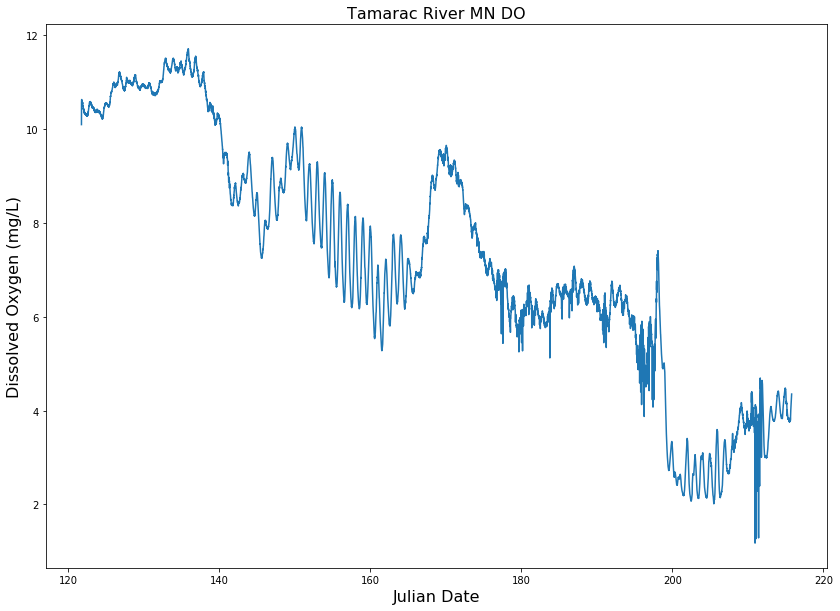

In [4]:
# Import data. 
df = pd.read_csv("TAM_DO_TEMP_SITE2.csv", sep=',')
# Create time series plot of DO concentrations as a function of Julian Date
plt.figure(figsize=(14,10))
plt.plot(df['Julian_Date'],df['DO']) 
plt.title('Tamarac River MN DO',fontsize=16)
plt.ylabel('Dissolved Oxygen (mg/L)',fontsize=16)
plt.xlabel('Julian Date',fontsize=16)
plt.show()

In [5]:
# print first and last 30 entries to check that data was loaded correctly
df

,time,bat,temp,DO,Q,day,Julian_Date
0,1459190640,3.50,5.728,10.099,0.974,16888.780556,121.780556
1,1459191540,3.49,4.141,10.569,0.985,16888.790972,121.790972
2,1459192440,3.48,4.081,10.612,0.987,16888.801389,121.801389
3,1459193340,3.48,4.131,10.634,0.988,16888.811806,121.811806
4,1459194240,3.48,4.263,10.598,0.987,16888.822222,121.822222
5,1459195140,3.48,4.394,10.603,0.987,16888.832639,121.832639
6,1459196040,3.48,4.465,10.612,0.988,16888.843056,121.843056
7,1459196940,3.48,4.555,10.594,0.987,16888.853472,121.853472
8,1459197840,3.48,4.676,10.571,0.986,16888.863889,121.863889
9,1459198740,3.48,4.746,10.592,0.988,16888.874306,121.874306


## Split data into training and test sets for cross validation

In [15]:
train = df[(df.Julian_Date < 160) | (df.Julian_Date >= 180)] # extract rows w/Julian_Date NOT between 160 & 180.. Training set
test = df[(df.Julian_Date >= 160) & (df.Julian_Date < 180)] # extract rows w/Julian_Date between 160 & 180.. Test set

## Examine Partial Autocorrelation Function

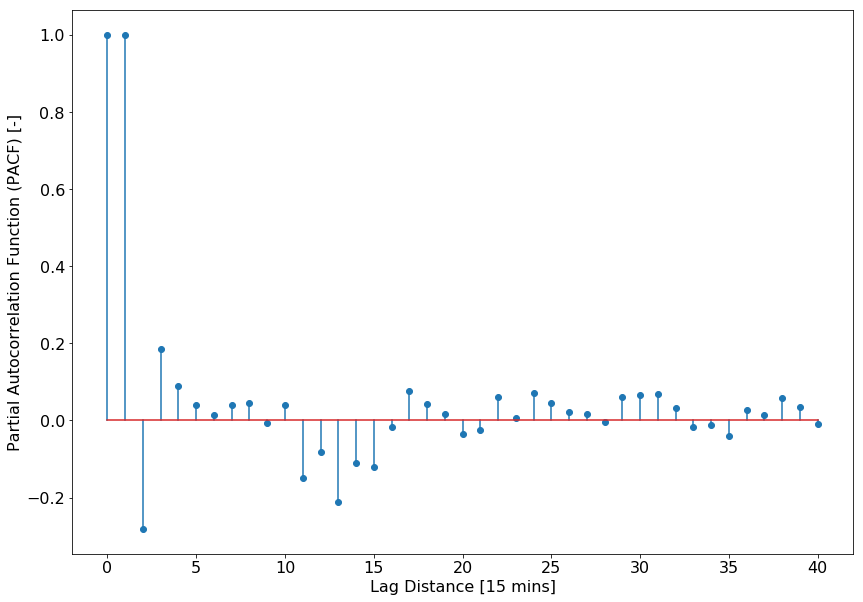

In [40]:
Dt = pd.Series(train.DO.values, train.Julian_Date.values) # create a dataframe with only DO and Julian_Dates for the training set

PCF = sm.pacf(Dt) # Calculate the partial autocorrelaion function

plt.figure(figsize=(14,10))
plt.stem(PCF)
plt.ylabel('Partial Autocorrelation Function (PACF) [-]',fontsize=16)
plt.xlabel('Lag Distance [15 mins]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

##### First two lags carry the most predictive power

## Fit AR(1) & AR(2) Models

In [41]:
DO_AR1 = sm.AR(Dt).fit(1)
#print(DO_AR1.params)
DO_AR2 = sm.AR(Dt).fit(2)
#print(DO_AR2.params)


ValueError: Given a pandas object and the index does not contain dates